In [10]:
import fly_analysis as fa
from matplotlib import pyplot as plt
import numpy as np
import multiprocessing as mp
import functools
import time

In [91]:
def plot_mean_and_std(arr, ax, label = None, abs=True, degrees=True, **kwargs):
    
    # define X as time in milliseconds, where frames 0-150, and dt=0.01
    X = np.arange(arr.shape[1]) * 10

    if abs:
        arr = np.abs(arr)

    if degrees:
        arr = np.rad2deg(arr)
        
    mean = np.nanmean(arr, axis=0)
    std = np.nanstd(arr, axis=0)
    
    ax.plot(X, mean, label=label, color=kwargs.get("color", None))
    ax.fill_between(X, mean - std, mean + std, color=kwargs.get("color", None), alpha=kwargs.get("alpha", 0.5))

In [11]:
root_folder = "/home/buchsbaum/mnt/md0/Experiments/"

### Define files

In [12]:
j21_files = ["20230906_155507.braidz"]
j73_files = ["20240910_140319.braidz", "20240912_140309.braidz", "20240914_140037.braidz"]
j74_files = ["20240911_151201.braidz", "20240913_141235.braidz", "20240915_140001.braidz"]

### Read data

In [13]:
start_time = time.time()
j21 = fa.braidz.read_multiple_braidz(j21_files, root_folder)
j74 = fa.braidz.read_multiple_braidz(j74_files, root_folder)
j73 = fa.braidz.read_multiple_braidz(j73_files, root_folder)

Reading /home/buchsbaum/mnt/md0/Experiments/20240911_151201.braidz using pyarrow
Reading /home/buchsbaum/mnt/md0/Experiments/20240913_141235.braidz using pyarrow
Reading /home/buchsbaum/mnt/md0/Experiments/20240915_140001.braidz using pyarrow
Reading /home/buchsbaum/mnt/md0/Experiments/20230906_155507.braidz using pyarrow
Reading /home/buchsbaum/mnt/md0/Experiments/20240910_140319.braidz using pyarrow
Reading /home/buchsbaum/mnt/md0/Experiments/20240912_140309.braidz using pyarrow
Reading /home/buchsbaum/mnt/md0/Experiments/20240914_140037.braidz using pyarrow
Single-threaded elapsed time: 125.8547101020813


### Extract stimuli centered data

In [45]:
j21_real_opto = j21["opto"]
j21_real = fa.processing.extract_stimulus_centered_data(j21["df"], j21_real_opto, padding=20)

2024-09-16 12:14:24,299 [WARNING] Frame 2135798 not found for object 124582
2024-09-16 12:14:26,442 [INFO] Skipped a total of 207 trajectories.
2024-09-16 12:14:26,443 [INFO] Skipped 0 trajectories because they were too short.
2024-09-16 12:14:26,446 [INFO] Skipped 1 trajectories because the frame index was not found.
2024-09-16 12:14:26,448 [INFO] Skipped 206 trajectories because there was insufficient data around the stimulus.


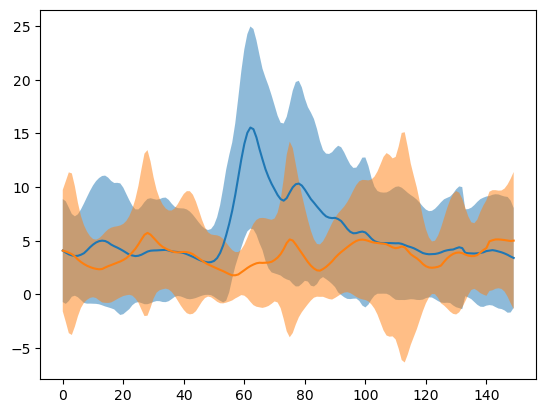

In [41]:
j73_real_opto = j73["opto"][j73["opto"]["sham"] == False]
j73_sham_opto = j73["opto"][j73["opto"]["sham"] == True]

j73_real = fa.processing.extract_stimulus_centered_data(j73["df"], j73_real_opto, padding=20)
j73_sham = fa.processing.extract_stimulus_centered_data(j73["df"], j73_sham_opto, padding=20)

fig, ax = plt.subplots()
plot_mean_and_std(j73_real[0]["real"]["angular_velocity"], ax, label="Real")
plot_mean_and_std(j73_sham[0]["sham"]["angular_velocity"], ax, label="Sham")
plt.show()


2024-09-16 12:14:59,901 [INFO] Skipped a total of 10 trajectories.
2024-09-16 12:14:59,902 [INFO] Skipped 0 trajectories because they were too short.
2024-09-16 12:14:59,903 [INFO] Skipped 0 trajectories because the frame index was not found.
2024-09-16 12:14:59,905 [INFO] Skipped 10 trajectories because there was insufficient data around the stimulus.
2024-09-16 12:15:01,271 [INFO] Skipped a total of 5 trajectories.
2024-09-16 12:15:01,273 [INFO] Skipped 0 trajectories because they were too short.
2024-09-16 12:15:01,275 [INFO] Skipped 0 trajectories because the frame index was not found.
2024-09-16 12:15:01,277 [INFO] Skipped 5 trajectories because there was insufficient data around the stimulus.


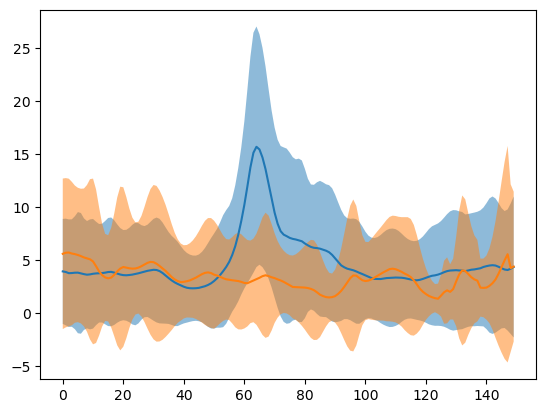

In [46]:
j74_real_opto = j74["opto"][j74["opto"]["sham"] == False]
j74_sham_opto = j74["opto"][j74["opto"]["sham"] == True]

j74_real = fa.processing.extract_stimulus_centered_data(j74["df"], j74_real_opto, padding=20)
j74_sham = fa.processing.extract_stimulus_centered_data(j74["df"], j74_sham_opto, padding=20)

fig, ax = plt.subplots()
plot_mean_and_std(j74_real[0]["real"]["angular_velocity"], ax, label="Real")
plot_mean_and_std(j74_sham[0]["sham"]["angular_velocity"], ax, label="Sham")
plt.show()


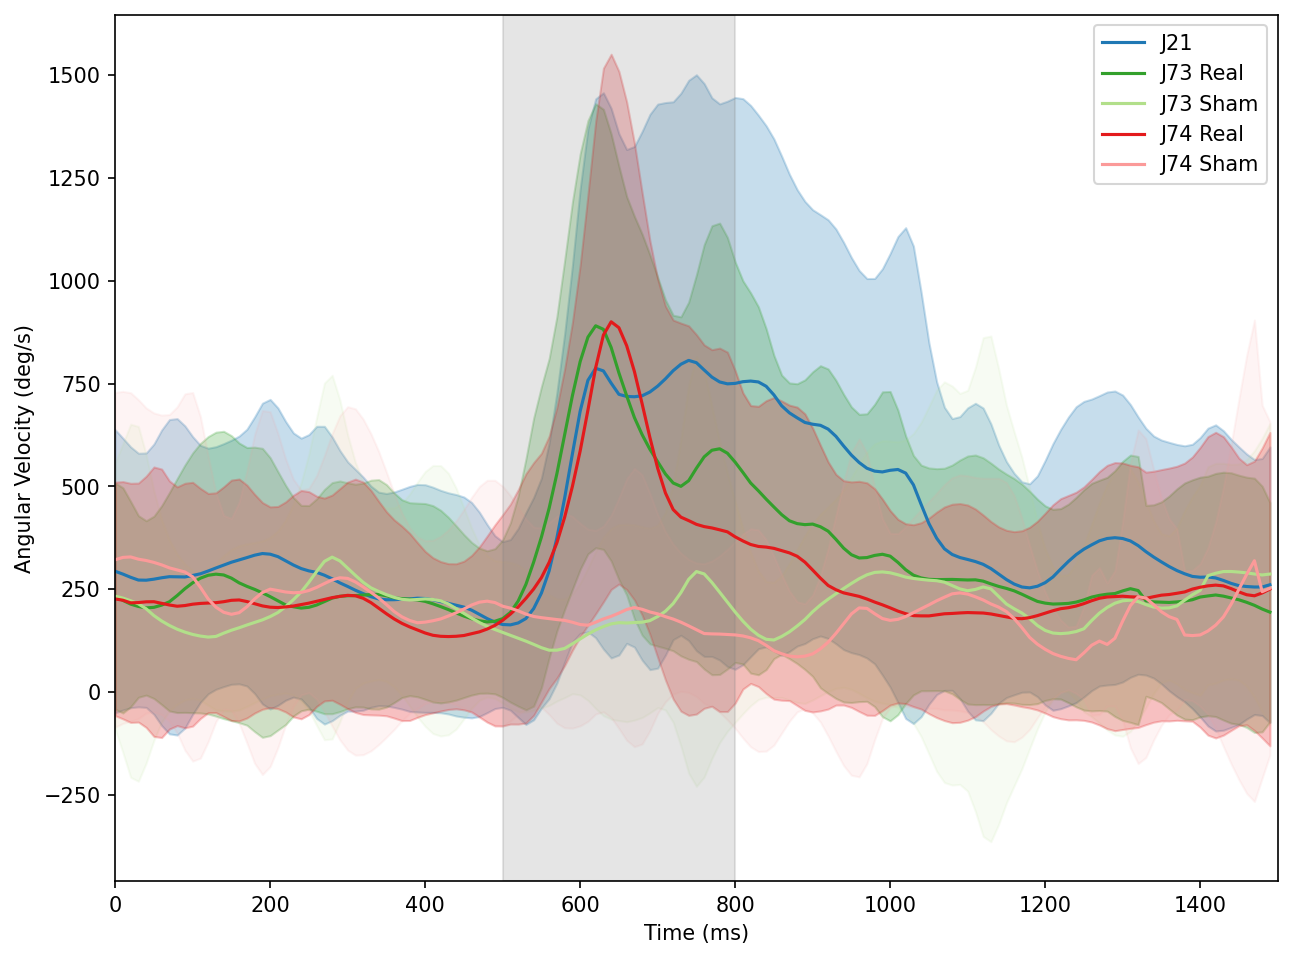

In [94]:
cmap_paired = plt.get_cmap("Paired")
fig, ax = plt.subplots(figsize=(10, 7.5), dpi=150)

plot_mean_and_std(j21_real[0]["real"]["angular_velocity"], ax, label="J21", alpha=0.25, color=cmap_paired(1))
#plot_mean_and_std(j21_real[0]["sham"]["angular_velocity"], ax, label="Real", alpha=0.24, color=cmap_paired(1))

plot_mean_and_std(j73_real[0]["real"]["angular_velocity"], ax, label="J73 Real", alpha=0.25, color=cmap_paired(3))
plot_mean_and_std(j73_sham[0]["sham"]["angular_velocity"], ax, label="J73 Sham", alpha=0.1, color=cmap_paired(2))

plot_mean_and_std(j74_real[0]["real"]["angular_velocity"], ax, label="J74 Real", alpha=0.25, color=cmap_paired(5))
plot_mean_and_std(j74_sham[0]["sham"]["angular_velocity"], ax, label="J74 Sham", alpha=0.1, color=cmap_paired(4))

plt.axvspan(500, 800, color="gray", alpha=0.2)
plt.xlim(0, 1500)
plt.xlabel("Time (ms)")
plt.ylabel("Angular Velocity (deg/s)")
plt.legend()
plt.show()

In [137]:
from scipy.signal import savgol_filter
def smooth_columns(df, columns= ["x", "y", "z", "xvel", "yvel", "zvel"]):
    for col in columns:
        if col in df.columns:
            arr = df[col].to_numpy()
            df[f"original_{col}"] = arr.copy()
            df[col] = savgol_filter(arr, 21, 3)
    return df

def extract_angular_velocity(df, opto):
    angular_velocity = []

    for idx, row in opto.iterrows():
        obj_id = int(row["obj_id"])
        frame = int(row["frame"])

        grp = df[df.obj_id == obj_id].copy()

        if len(grp)<=150:
            continue
        
        try:
            stim_idx = np.where(grp.frame == frame)[0][0]
        except IndexError:
            continue
        
        idx_before = stim_idx - 50
        idx_after = stim_idx + 100

        if idx_before < 0 or idx_after >= len(grp):
            continue

        grp = smooth_columns(grp)

        grp = grp.iloc[idx_before:idx_after]

        xyz = grp[["x", "y", "z"]].to_numpy()
        saccades, angvels = fa.trajectory.detect_saccades(grp)
    
    return xyz, saccades, angvels

In [138]:
xyz, saccades, angvels = extract_angular_velocity(j21["df"], j21["opto"])

In [143]:
print(j21["opto"].columns)

Index(['obj_id', 'frame', 'x', 'y', 'z', 'xvel', 'yvel', 'zvel', 'P00', 'P01',
       'P02', 'P11', 'P12', 'P22', 'P33', 'P44', 'P55', 'trigger_time',
       'ntrig', 'opto_duration', 'opto_intensity', 'opto_frequency',
       'unique_obj_id', 'exp_num'],
      dtype='object')


: 

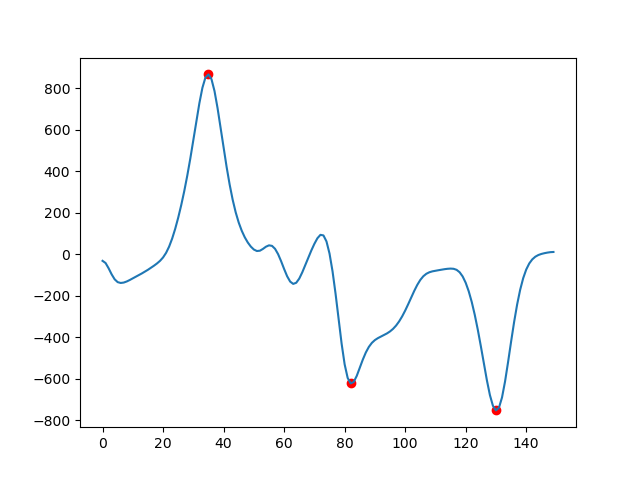

In [140]:
%matplotlib widget
fig = plt.figure()
X = np.arange(len(angvels))
plt.plot(X, angvels)
plt.scatter(X[saccades.astype(int)], angvels[saccades.astype(int)], color='red')
plt.show()